# Importing Libraries and Loading Data

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("COVID19_line_list_data.csv", index_col = "id")

In [3]:
del df["case_in_country"]
del df['Unnamed: 3']
del df["location"]
del df["If_onset_approximated"]
del df['hosp_visit_date']
del df["symptom"]
del df["source"]
del df["link"]

In [4]:
del df['Unnamed: 21']
del df['Unnamed: 22']
del df['Unnamed: 23']
del df['Unnamed: 24']
del df['Unnamed: 25']
del df['Unnamed: 26']

In [5]:
del df["summary"]

In [6]:
df.head()

,reporting date,country,gender,age,symptom_onset,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
id,,,,,,,,,,,
1,1/20/2020,China,male,66.0,01/03/20,12/29/2019,01/04/20,1,0.0,0,0
2,1/20/2020,China,female,56.0,1/15/2020,NaN,01/12/20,0,1.0,0,0
3,1/21/2020,China,male,46.0,01/04/20,NaN,01/03/20,0,1.0,0,0
4,1/21/2020,China,female,60.0,NaN,NaN,NaN,1,0.0,0,0
5,1/21/2020,China,male,58.0,NaN,NaN,NaN,0,0.0,0,0


# Data Cleaning

In [7]:
def gender(str):
    if str == "male":
        return 1
    else:
        return 2
    
df["gender"] = df["gender"].apply(gender)

In [8]:
def location(str):
    if str == "Afghanistan":
        return 1
    elif str == "Algeria":
        return 2
    elif str == "Australia":
        return 3
    elif str == "Austria":
        return 4
    elif str == "Cambodia":
        return 5
    elif str == "Bahrain":
        return 6
    elif str == "Belgium":
        return 7
    elif str == "Canada":
        return 8
    elif str == "China":
        return 9
    elif str == "Croatia":
        return 10
    elif str == "Egypt":
        return 11
    elif str == "France":
        return 12
    elif str == "Germany":
        return 13
    elif str == "Hong Kong":
        return 14
    elif str == "India":
        return 15
    elif str == "Israel":
        return 16
    elif str == "Iran":
        return 17
    elif str == "Italy":
        return 18
    elif str == "Kuwait":
        return 19
    elif str == "Japan":
        return 20
    elif str == "Lebanon":
        return 21
    elif str == "Malaysia":
        return 22
    elif str == "Nepal":
        return 23
    elif str == "Phillipines":
        return 24
    elif str == "Russia":
        return 25
    elif str == "Singapore":
        return 26
    elif str == "Spain":
        return 27
    elif str == "Sri Lanka":
        return 28
    elif str == "South Korea":
        return 29
    elif str == "Switzerland":
        return 30
    elif str == "Taiwan":
        return 31
    elif str == "Thailand":
        return 32
    elif str == "UAE":
        return 33
    elif str == "UK":
        return 34
    elif str == "USA":
        return 35
    elif str == "Finland":
        return 36
    else:
        return 37

In [9]:
df["country"] = df["country"].apply(location)

# Data Analysis

#### Distribution by location

In [10]:
locs = np.array(df.country)
print(np.unique(locs))
# 38 different Locations

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


#### Age

Text(0, 0.5, 'Age')

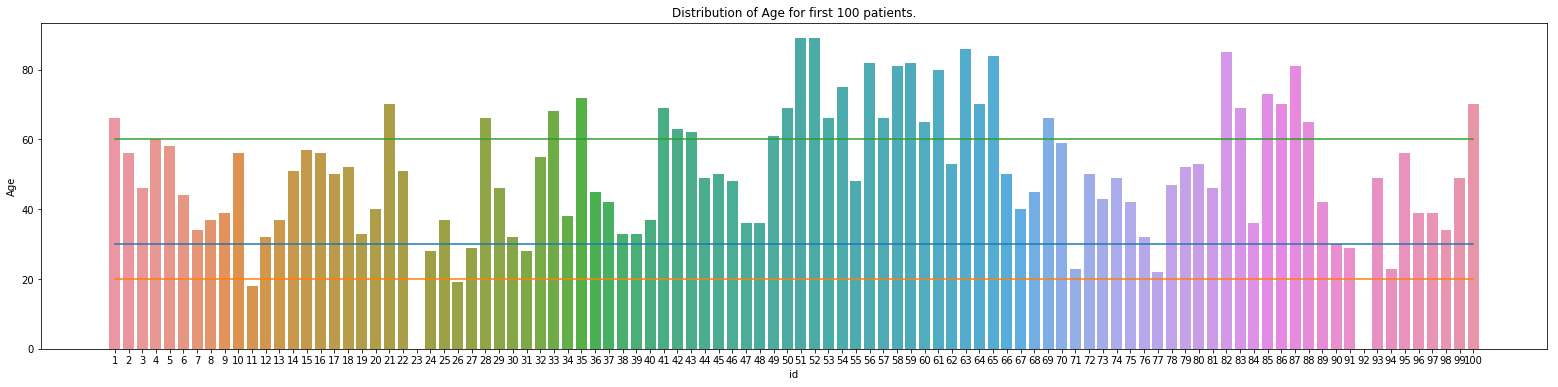

In [11]:
a = [30 for i in range(100)]
b = [20 for i in range(100)]
c = [60 for i in range(100)]
plt.figure(figsize=(27,6))

plt.title("Distribution of Age for first 100 patients.")
sns.barplot(x=df.index[:100], y=df['age'][:100])

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.ylabel("Age")

#### Gender

Text(0, 0.5, 'Age')

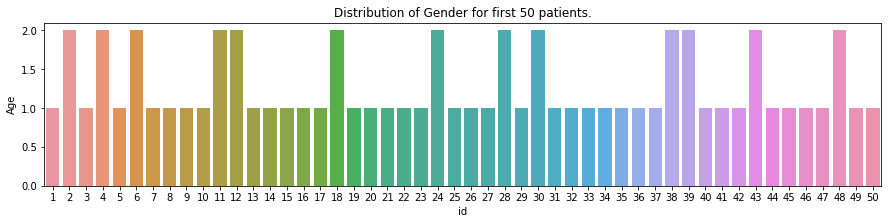

In [12]:
plt.figure(figsize=(15,3))

plt.title("Distribution of Gender for first 50 patients.")
sns.barplot(x=df.index[:50], y=df['gender'][:50])

plt.ylabel("Age")

In [13]:
del df["exposure_end"]
del df["exposure_start"]

In [14]:
del df["symptom_onset"]

#### Dates

In [15]:
df["reporting date"].fillna("1/21/2020", inplace = True)

In [16]:
def dates(a):
    li = a.split('/')
    x1 = float(li[0])
    x2 = float(li[1])
    ans = (x1 * (x2 ** 2)) ** 0.5
    return ans

In [17]:
df['reporting date']= df['reporting date'].apply(dates)

#### Is Wuhan a Factor? (FOR CHINESE CITIZENS)

Text(0, 0.5, '1 : Visited Wuhan')

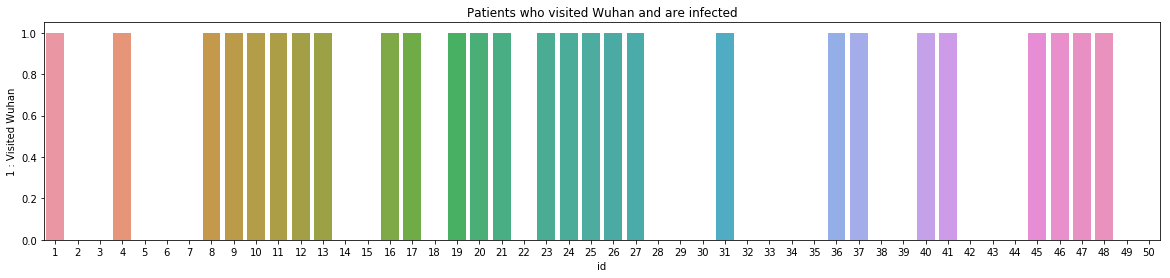

In [18]:
plt.figure(figsize=(20,4))

plt.title("Patients who visited Wuhan and are infected")
sns.barplot(x=df.index[:50], y=df['visiting Wuhan'][:50])

plt.ylabel("1 : Visited Wuhan")

Text(0, 0.5, '1 : From Wuhan')

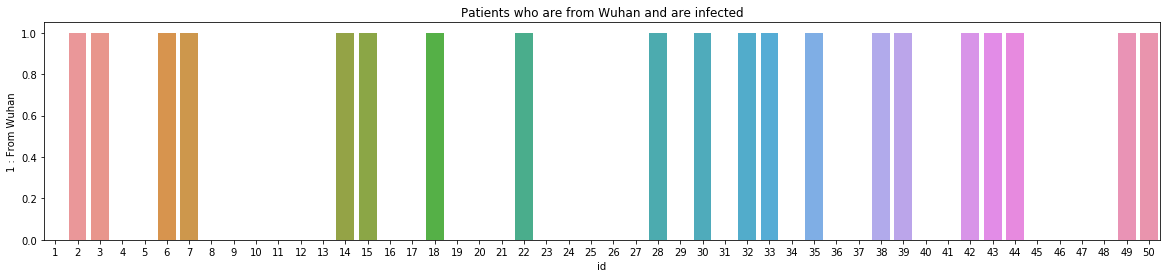

In [19]:
plt.figure(figsize=(20,4))

plt.title("Patients who are from Wuhan and are infected")
sns.barplot(x=df.index[:50], y=df['from Wuhan'][:50])

plt.ylabel("1 : From Wuhan")

#### Result of Data Analysis:

1. Patients are usually between the age group 37 and above.
2. Patients below 15 years old are consisted of non-existent or minimal cases.
3. For unknown reason, females are more widely infected.
4. For Chinese residents, being from Wuhan or visiting it is a big factor.

# Final Preperation of Data

In [20]:
df.reset_index(inplace = True) 
df.head()

,id,reporting date,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
0,1,20.0,9,1,66.0,1,0.0,0,0
1,2,20.0,9,2,56.0,0,1.0,0,0
2,3,21.0,9,1,46.0,0,1.0,0,0
3,4,21.0,9,2,60.0,1,0.0,0,0
4,5,21.0,9,1,58.0,0,0.0,0,0


In [21]:
del df["id"]

In [22]:
df["reporting date"].fillna(0, inplace = True)
df["country"].fillna(9, inplace = True)
df["age"].fillna(45, inplace = True)
df["from Wuhan"].fillna(1, inplace = True)
df["visiting Wuhan"].fillna(1, inplace = True)
df["death"].fillna(1, inplace = True)
df["recovered"].fillna(1, inplace = True)

In [23]:
df["Age_Gender"] = df["age"]*df["gender"]

In [24]:
df.head()

,reporting date,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,Age_Gender
0,20.0,9,1,66.0,1,0.0,0,0,66.0
1,20.0,9,2,56.0,0,1.0,0,0,112.0
2,21.0,9,1,46.0,0,1.0,0,0,46.0
3,21.0,9,2,60.0,1,0.0,0,0,120.0
4,21.0,9,1,58.0,0,0.0,0,0,58.0


In [25]:
def change(str):
    if str == '0':
        return 0
    elif str == '1':
        return 1
    else:
        return 1

In [26]:
df["death"] = df["death"].apply(change)

In [27]:
df["recovered"] = df["recovered"].apply(change)

In [28]:
Y1 = df["death"]
Y2 = df["recovered"]
del df["death"]
del df["recovered"]

In [29]:
Y1 = np.array(Y1)
Y2 = np.array(Y2)

# for i in range(len(Y1)):
#     if type(Y1[i] == str):
#         Y1[i] = 1
        
# for i in range(len(Y2)):
#     if type(Y2[i] == str):
#         Y2[i] = 1

In [30]:
X = df.values

In [31]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y2)

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Classification of Deaths

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical  

In [52]:
model = Sequential()

In [53]:
model.add(Dense(32, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))
# model.add(Dense(512, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [54]:
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train1, Y_train1, epochs = 50, batch_size = 5)

Epoch 1/50
813/813 [==============================] - 0s 459us/sample - loss: 0.7541 - acc: 0.0627
Epoch 2/50
813/813 [==============================] - 0s 238us/sample - loss: 0.7483 - acc: 0.0627
Epoch 3/50
  5/813 [..............................] - ETA: 0s - loss: 0.7559 - acc: 0.0000e+00

In [42]:
predictions = model.predict(X_test1)
score = model.evaluate(X_test1, Y_test1)
print(score)

272/272 [==============================] - 0s 249us/sample - loss: 0.1831 - acc: 0.9559
[0.18310487095047445, 0.9558824]


# Classification of Recovery

In [387]:
model.fit(X_train1, Y_train2, epochs = 50, batch_size = 10)

Epoch 1/50
813/813 [==============================] - 0s 314us/sample - loss: 2.3337 - acc: 0.8487
Epoch 2/50
813/813 [==============================] - 0s 319us/sample - loss: 2.3337 - acc: 0.8487
Epoch 3/50
813/813 [==============================] - 0s 284us/sample - loss: 2.3337 - acc: 0.8487
Epoch 4/50
813/813 [==============================] - 0s 290us/sample - loss: 2.3337 - acc: 0.8487
Epoch 5/50
813/813 [==============================] - 0s 314us/sample - loss: 2.3337 - acc: 0.8487
Epoch 6/50
813/813 [==============================] - 0s 319us/sample - loss: 2.3337 - acc: 0.8487
Epoch 7/50
813/813 [==============================] - 0s 294us/sample - loss: 2.3337 - acc: 0.8487
Epoch 8/50
813/813 [==============================] - 0s 313us/sample - loss: 2.3337 - acc: 0.8487
Epoch 9/50
813/813 [==============================] - 0s 294us/sample - loss: 2.3337 - acc: 0.8487
Epoch 10/50
813/813 [==============================] - 0s 295us/sample - loss: 2.3337 - acc: 0.8487
Epoch 11/

In [388]:
predictions2 = model.predict(X_test2)
score2 = model.evaluate(X_test2, Y_test2)
print(score2)

272/272 [==============================] - 0s 54us/sample - loss: 2.0415 - acc: 0.8676
[2.0415372988756966, 0.86764705]


# Result

#### Using given features and adding one extra feature:

1. Prediction of death can be made with 94% accuracy.
2. Prediction of recovery can be made with 86.7% accuracy.